
# SI 370 - Homework 6 

Version 2022.11.16

In this assignment, you'll apply your knowledge of classification to text analysis, specifically real and fake news. Your task is to predict whether a news article is real or fake using the available information.

The dataset that you'll use is described at https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
as well as the following references:

Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.

Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).

You will probably get the most informative information from the content of the articles as well as their titles.  

You have at your disposal several
techniques that you can use to create features from text, including, word embedding, part-of-speech analysis (from SI 330), and so on.  You might want to use CountVectorizer and/or TfidfVectorizer from the
sklearn.feature_extraction library, which are described below.

You should pre-process your text using at least some of the steps outlined in lectures (e.g. normalizing to lowercase, splitting into words, etc.).

The articles are provided in two different files: Fake.csv and True.csv.  We recommend that you create a dataframe with the contents of those files combined, including a new column that specifies whether the article is real or fake (note that you can use whatever coding you want for "real" vs. "fake", e.g. 1 and 0, "real" and "fake", "false" and "true" -- whatever works for you.

You should split the resulting combined dataframe into training and testing datasets OR use cross-validation.  If you go the splitting-into-training-and-testing route, we recommend an 80-20 split (i.e. training gets 80% of the data; testing gets 20%) and use the testing dataset to report your accuracy score.  If you go the cross-validation route, we recommend using 5-fold cross-validation and use the mean accuracy score for your 5 folds when reporting your accuracy score.


Much like the previous homework assignment, you'll want to try a variety of classifiers and possibly use an ensemble.  And, in a similar way to the previous homework assignment, your submission (to Canvas -- there is no requirement to submit this anywhere else, including Kaggle) should be based on a Jupyter notebook that you create.

Points will be allocated as follows:

| Component | Points |
|:---|:---|
|1. Text pre-processing and feature extraction, including justification for your choices| 8 |
|2. Use of at least three classifiers, not including VotingClassifier (if you use it) |  6  |
|3. Accuracy (based on test dataset)| 75%: 2 , 80%: 4 , 90%: 6  |

Note that you are welcome to use VotingClassifier to improve your accuracy, you just can't count it as one of the three classifiers for points in Component 2.


The following tutorial is from https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# CountVectorizer -- Brief Tutorial

*    CountVectorizer can lowercase letters, disregard punctuation and stopwords, but it can't LEMMATIZE or STEM

In [3]:
# Stopping by Woods on a Snowy Evening by Robert Frost
txt = ["""Whose woods these are I think I know.
His house is in the village though;
He will not see me stopping here
To watch his woods fill up with snow.""",
       
"""My little horse must think it queer
To stop without a farmhouse near
Between the woods and frozen lake
The darkest evening of the year.""",

"""He gives his harness bells a shake
To ask if there is some mistake.
The only other sound's the sweep
Of easy wind and downy flake.""",

"""The woods are lovely, dark and deep,
But I have promises to keep,
And miles to go before I sleep,
And miles to go before I sleep."""]

In [4]:
txt

['Whose woods these are I think I know.\nHis house is in the village though;\nHe will not see me stopping here\nTo watch his woods fill up with snow.',
 'My little horse must think it queer\nTo stop without a farmhouse near\nBetween the woods and frozen lake\nThe darkest evening of the year.',
 "He gives his harness bells a shake\nTo ask if there is some mistake.\nThe only other sound's the sweep\nOf easy wind and downy flake.",
 'The woods are lovely, dark and deep,\nBut I have promises to keep,\nAnd miles to go before I sleep,\nAnd miles to go before I sleep.']

**Features in Bag of Words**

In [5]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
# print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['ask', 'bells', 'dark', 'darkest', 'deep', 'downy', 'easy', 'evening', 'farmhouse', 'flake', 'frozen', 'gives', 'harness', 'horse', 'house', 'know', 'lake', 'little', 'lovely', 'miles', 'mistake', 'near', 'promises', 'queer', 'shake', 'sleep', 'snow', 'sound', 'stop', 'stopping', 'sweep', 'think', 'village', 'watch', 'wind', 'woods', 'year']


/Users/haleyjohnson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Vocabulary and vocabulary ID**

In [6]:
print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 37
Vocabulary content:
 {'woods': 35, 'think': 31, 'know': 15, 'house': 14, 'village': 32, 'stopping': 29, 'watch': 33, 'snow': 26, 'little': 17, 'horse': 13, 'queer': 23, 'stop': 28, 'farmhouse': 8, 'near': 21, 'frozen': 10, 'lake': 16, 'darkest': 3, 'evening': 7, 'year': 36, 'gives': 11, 'harness': 12, 'bells': 1, 'shake': 24, 'ask': 0, 'mistake': 20, 'sound': 27, 'sweep': 30, 'easy': 6, 'wind': 34, 'downy': 5, 'flake': 9, 'lovely': 18, 'dark': 2, 'deep': 4, 'promises': 22, 'miles': 19, 'sleep': 25}


In [7]:
bag_of_words.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
        1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

# N-grams (sets of consecutive words)
* N=2

In [8]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['ask', 'ask mistake', 'bells', 'bells shake', 'dark', 'dark deep', 'darkest', 'darkest evening', 'deep', 'deep promises', 'downy', 'downy flake', 'easy', 'easy wind', 'evening', 'evening year', 'farmhouse', 'farmhouse near', 'flake', 'frozen', 'frozen lake', 'gives', 'gives harness', 'harness', 'harness bells', 'horse', 'horse think', 'house', 'house village', 'know', 'know house', 'lake', 'lake darkest', 'little', 'little horse', 'lovely', 'lovely dark', 'miles', 'miles sleep', 'mistake', 'mistake sound', 'near', 'near woods', 'promises', 'promises miles', 'queer', 'queer stop', 'shake', 'shake ask', 'sleep', 'sleep miles', 'snow', 'sound', 'sound sweep', 'stop', 'stop farmhouse', 'stopping', 'stopping watch', 'sweep', 'sweep easy', 'think', 'think know', 'think queer', 'village', 'village stopping', 'watch', 'watch woods', 'wind', 'wind downy', 'woods', 'woods frozen', 'woods lovely', 'woods snow', 'woods think', 'year']


* N=3

In [9]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['ask', 'ask mistake', 'ask mistake sound', 'bells', 'bells shake', 'bells shake ask', 'dark', 'dark deep', 'dark deep promises', 'darkest', 'darkest evening', 'darkest evening year', 'deep', 'deep promises', 'deep promises miles', 'downy', 'downy flake', 'easy', 'easy wind', 'easy wind downy', 'evening', 'evening year', 'farmhouse', 'farmhouse near', 'farmhouse near woods', 'flake', 'frozen', 'frozen lake', 'frozen lake darkest', 'gives', 'gives harness', 'gives harness bells', 'harness', 'harness bells', 'harness bells shake', 'horse', 'horse think', 'horse think queer', 'house', 'house village', 'house village stopping', 'know', 'know house', 'know house village', 'lake', 'lake darkest', 'lake darkest evening', 'little', 'little horse', 'little horse think', 'lovely', 'lovely dark', 'lovely dark deep', 'miles', 'miles sleep', 'miles sleep miles', 'mistake', 'mistake sound', 'mistake sound sweep', 'near', 'near woods', 'near woods frozen', 'promises', 'promises miles', 'promises mile

In [10]:
bag_of_words

<4x110 sparse matrix of type '<class 'numpy.int64'>'
	with 113 stored elements in Compressed Sparse Row format>

In [11]:
bag_of_words.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1

# Min_df

**Min_df** ignores terms that have a document frequency (presence in % of documents) strictly lower than the given threshold. For example, Min_df=0.66 requires that a term appear in 66% of the docuemnts for it to be considered part of the vocabulary.

**Sometimes min_df is used to limit the vocabulary size, so it learns only those terms that appear in at least 10%, 20%, etc. of the documents.**

In [12]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=0.75, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())


['woods']


Only "woods" appears in 3 out of 4 (75%) of the "documents" (stanzas), which is why other words are not included.

# Max_df

When building the vocabulary, it ignores terms that have a document frequency strictly higher than the given threshold. This could be used to exclude terms that are too frequent and are unlikely to help predict the label. For example, by analyzing reviews on the movie Lion King, the term 'Lion' might appear in 90% of the reviews (documents), in which case, we could consider establishing Max_df=0.89

In [13]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=0.74, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())


['ask', 'bells', 'dark', 'darkest', 'deep', 'downy', 'easy', 'evening', 'farmhouse', 'flake', 'frozen', 'gives', 'harness', 'horse', 'house', 'know', 'lake', 'little', 'lovely', 'miles', 'mistake', 'near', 'promises', 'queer', 'shake', 'sleep', 'snow', 'sound', 'stop', 'stopping', 'sweep', 'think', 'village', 'watch', 'wind', 'year']


Only "woods", in addition to the stopwords, is left out because it occurs in more than 74% of the time.

# Max_features

Limit the amount of features (vocabulary) that the vectorizer will learn, based on highest term frequency, although see TfiftVectorizer below.

In [14]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=4)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['miles', 'sleep', 'think', 'woods']


# TfidfVectorizer -- Brief Tutorial

The goal of using tf-idf is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. (https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/feature_extraction/text.py#L1365)

formula used: 
$tfidf(d, t) = tf(t) \times idf(d, t)$

* tf(t)= the term frequency is the number of times the term appears in the document
* idf(d, t) = the document frequency is the number of documents 'd' that contain term 't'

In [15]:
txt1 = ['His smile was not perfect', 'His smile was not not not not perfect', 'She did not sing']
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(txt1)
txt_transformed = txt_fitted.transform(txt1)
print("The text: ", txt1)

The text:  ['His smile was not perfect', 'His smile was not not not not perfect', 'She did not sing']


The learned corpus vocabulary

In [16]:
tf.vocabulary_

{'his': 1,
 'smile': 6,
 'was': 7,
 'not': 2,
 'perfect': 3,
 'she': 4,
 'did': 0,
 'sing': 5}

**IDF:** The inverse document frequency

In [17]:
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))

{'did': 2.09861228866811, 'his': 1.4054651081081644, 'not': 1.0, 'perfect': 1.4054651081081644, 'she': 2.09861228866811, 'sing': 2.09861228866811, 'smile': 1.4054651081081644, 'was': 1.4054651081081644}


We see that the tokens 'sang','she' have the most idf weight because 
they are the only tokens that appear in one document only.
The token 'not' appears 6 times but it is also in all documents, so its idf is the lowest.

Graphing inverse document frequency

In [18]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))

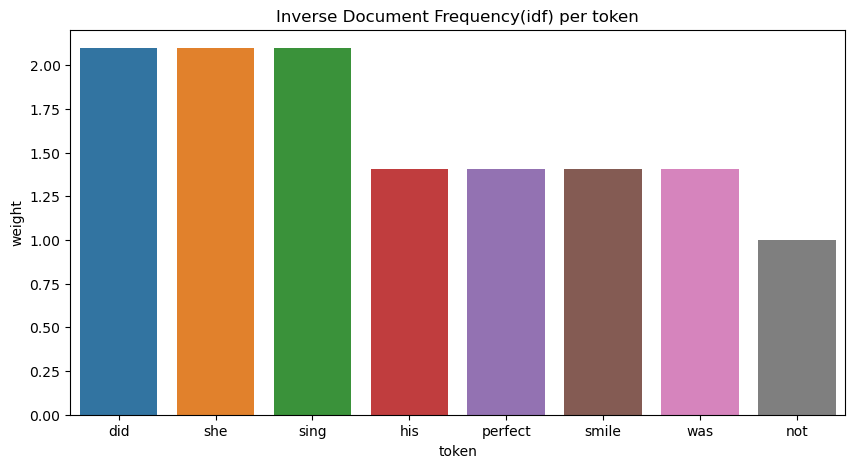

In [19]:
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns = ('token', 'weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight

sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Listing (instead of graphing) inverse document frequency

In [20]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['not' 'his' 'perfect']

Features with highest idf:
['did' 'she' 'sing']


/Users/haleyjohnson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Weight of tokens per document**

In [21]:
print("The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1\
 its weight is 0 because it does not appear there.")
txt_transformed.toarray()

The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1 its weight is 0 because it does not appear there.


array([[0.        , 1.40546511, 1.        , 1.40546511, 0.        ,
        0.        , 1.40546511, 1.40546511],
       [0.        , 1.40546511, 4.        , 1.40546511, 0.        ,
        0.        , 1.40546511, 1.40546511],
       [2.09861229, 0.        , 1.        , 0.        , 2.09861229,
        2.09861229, 0.        , 0.        ]])

**Summary:** the more times a token appears in a document, the more weight it will have. However, the more documents the token appears in, it is 'penalized' and the weight is diminished. For example, the weight for token 'not' is 4, but if it did not appear in all documents (that is, only in one document) its weight would have been 8.3

**TF-IDF** - Maximum token value throughout the whole dataset

In [ ]:
new1 = tf.transform(txt1)

# find maximum value for each of the features over all of dataset:
max_val = new1.max(axis=0).toarray().ravel()

#sort weights from smallest to biggest and extract their indices 
sort_by_tfidf = max_val.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sort_by_tfidf[:3]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sort_by_tfidf[-3:]]))

In [ ]:
df = pd.DataFrame(new1.toarray(),columns=feature_names)

In [ ]:
df